This notebook shows how I pulled in the data, performed exploratory data analysis, cleaned out null data and created two dataframes to test modeling by making dummies of the different categorical variables for one dataframe, and running natural language processing on the description column to create an NLP dataframe. 

For both dataframes, I ran them across multiple model types to test performance. The trick in this assignment was ensuring the best result possible, while also accounting for overfitting. I found that logistic regression and knearest neighbors performed well, but unlike with decision trees, were not prone to overfitting. Therefore, after running four different model types on two datasets, I picked logreg and knn to run using test_train_split, to ensure the lack of overfit. 

## Import all the packages, look at the data

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

In [2]:
#read the dataframe from Kaggle
df = pd.read_csv('./winemag-data-130k-v2.csv')

In [3]:
#look at various aspects of the dataframe
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
print df.shape
df.dtypes

(129971, 14)


Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

 take a look at the different columns to see how many categories are in each column too many categories means that the values will not be distinct enough for the algorithm to pick up

In [5]:
cols = df.columns
for name in cols:
    print name, len(df[name].value_counts())

Unnamed: 0 129971
country 43
description 119955
designation 37979
points 21
price 390
province 425
region_1 1229
region_2 17
taster_name 19
taster_twitter_handle 15
title 118840
variety 707
winery 16757


In [6]:
#check the number of nulls in each column
df.isnull().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

## In order to limit the number of features, I will not be including certain columns in the algorithm
### - columns with more than ~1200 features (1% of dataset)
    - designation
    - title
    - winery
### - columns with repetitive information
    - Unnamed: 0
    - taster_twitter_handle

In [7]:
delete_cols = ['Unnamed: 0','designation','title','winery','taster_twitter_handle']
df = df.drop(delete_cols, axis=1)

## intent: detect distinct patterns of behavior in tasters with with 2.6% or less, using graphs and sections of data to look deeper into data patterns

### ** in trying to limit overfit, I ended up commenting out the code that limited the number of tasters

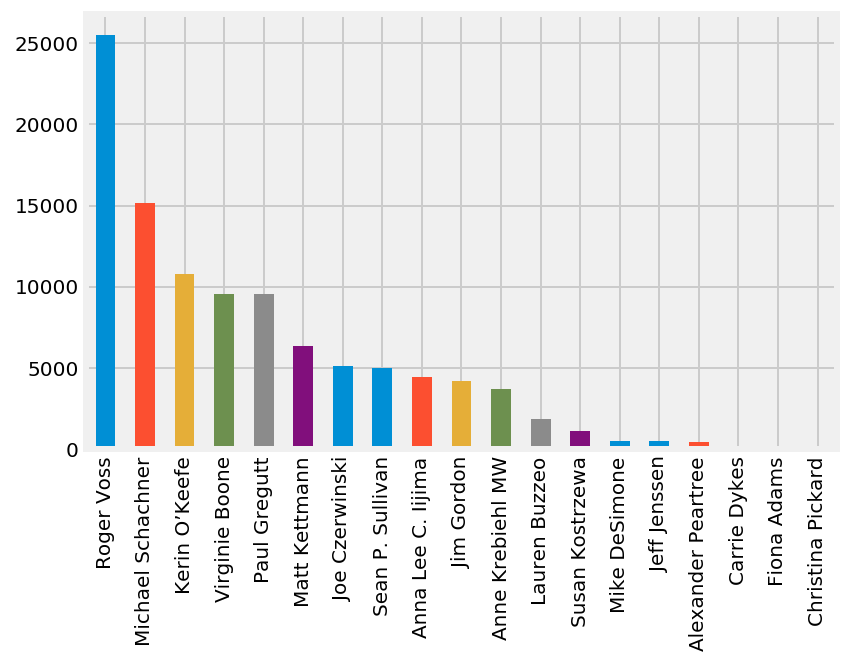

In [8]:
df.taster_name.value_counts().plot(kind='bar')

In [9]:
#look at the lowest tasters, see if there is anything distinct about their reviews

In [10]:
df.loc[(df["taster_name"]=="Christina Pickard")]

,country,description,points,price,province,region_1,region_2,taster_name,variety
19831,Australia,A blend of Shiraz from Eden Valley and the val...,93,50.0,South Australia,Barossa,NaN,Christina Pickard,Shiraz
41472,US,"Buttered toast, yeast and a hint of nut wrap a...",87,19.0,California,Carneros,Napa-Sonoma,Christina Pickard,Chardonnay
44042,US,"Dried spices, dusty earth and steely red fruit...",89,29.0,California,Carneros,Napa-Sonoma,Christina Pickard,Pinot Meunier
59324,US,"This 100% Pinot Noir is full-bodied and rich, ...",89,30.0,California,Sonoma County,Sonoma,Christina Pickard,Sparkling Blend
69990,US,Lots of Russian River character in this supple...,87,28.0,California,Russian River Valley,Sonoma,Christina Pickard,Pinot Noir
98690,US,"Made without oak, this wine is brisk with acid...",82,20.0,California,Dry Creek Valley,Sonoma,Christina Pickard,Sauvignon Blanc


#most of Christina's reviews are from California
price_sonoma = df.loc[((df["region_2"]=="Sonoma") | (df['region_2'] == "Napa-Sonoma")), ['price','points']]
price_sonoma.mean()

In [11]:
price_pick_sonoma = df.loc[((df["region_2"]=="Sonoma") | (df['region_2'] == "Napa-Sonoma")) \
                           & (df["taster_name"]=="Christina Pickard"), ["price","points"]]
price_pick_sonoma.mean()

price     25.2
points    86.8
dtype: float64

#### As said above:
** note that while there did not seem to be a significant distinct number of features for the "few reviews", by eyeballing the differences as shown above,  when running the models, I ran into an overfitting problem, and therefore came back here and decided to leave in all the different tasters



## Once columns are removed, look at the new null values prior to making dummies

In [12]:
df.isnull().sum()

country           63
description        0
points             0
price           8996
province          63
region_1       21247
region_2       79460
taster_name    26244
variety            1
dtype: int64

In [13]:
#delete all rows where taster_name is null
df = df[pd.notnull(df['taster_name'])]

In [14]:
#delete rows with country & province nulls, as there are only a few
df = df[df.country.notnull()]
df = df[df.province.notnull()]

In [15]:
#look at more graphs of the data

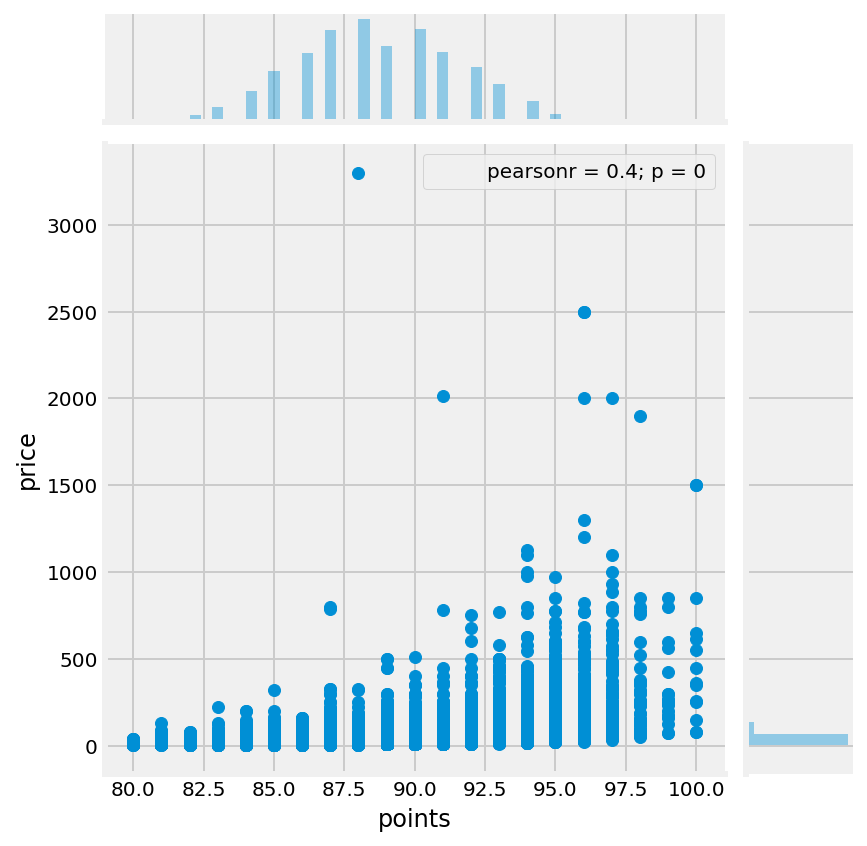

In [16]:
sns.jointplot(df['points'],df['price'])

In [17]:
df.price.describe()

count    96420.000000
mean        35.005009
std         43.069060
min          4.000000
25%         17.000000
50%         25.000000
75%         40.000000
max       3300.000000
Name: price, dtype: float64

In [18]:
df['price'].fillna((df['price'].mean()), inplace=True)

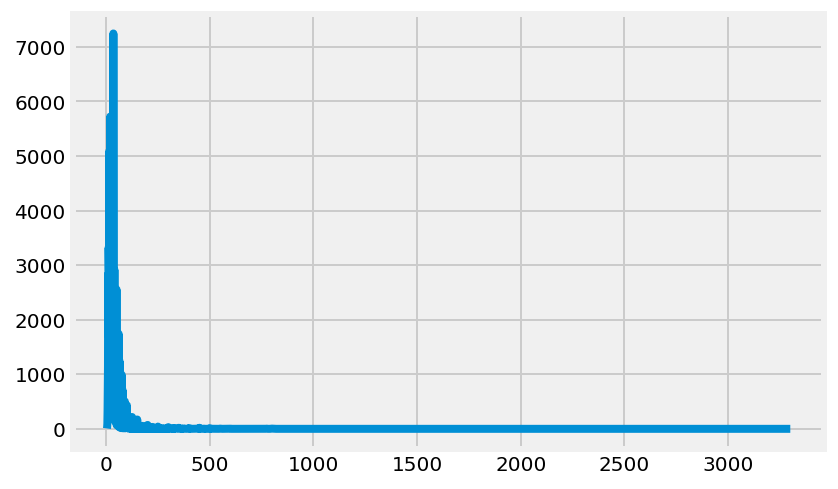

In [19]:
df.price.value_counts().sort_index().plot()

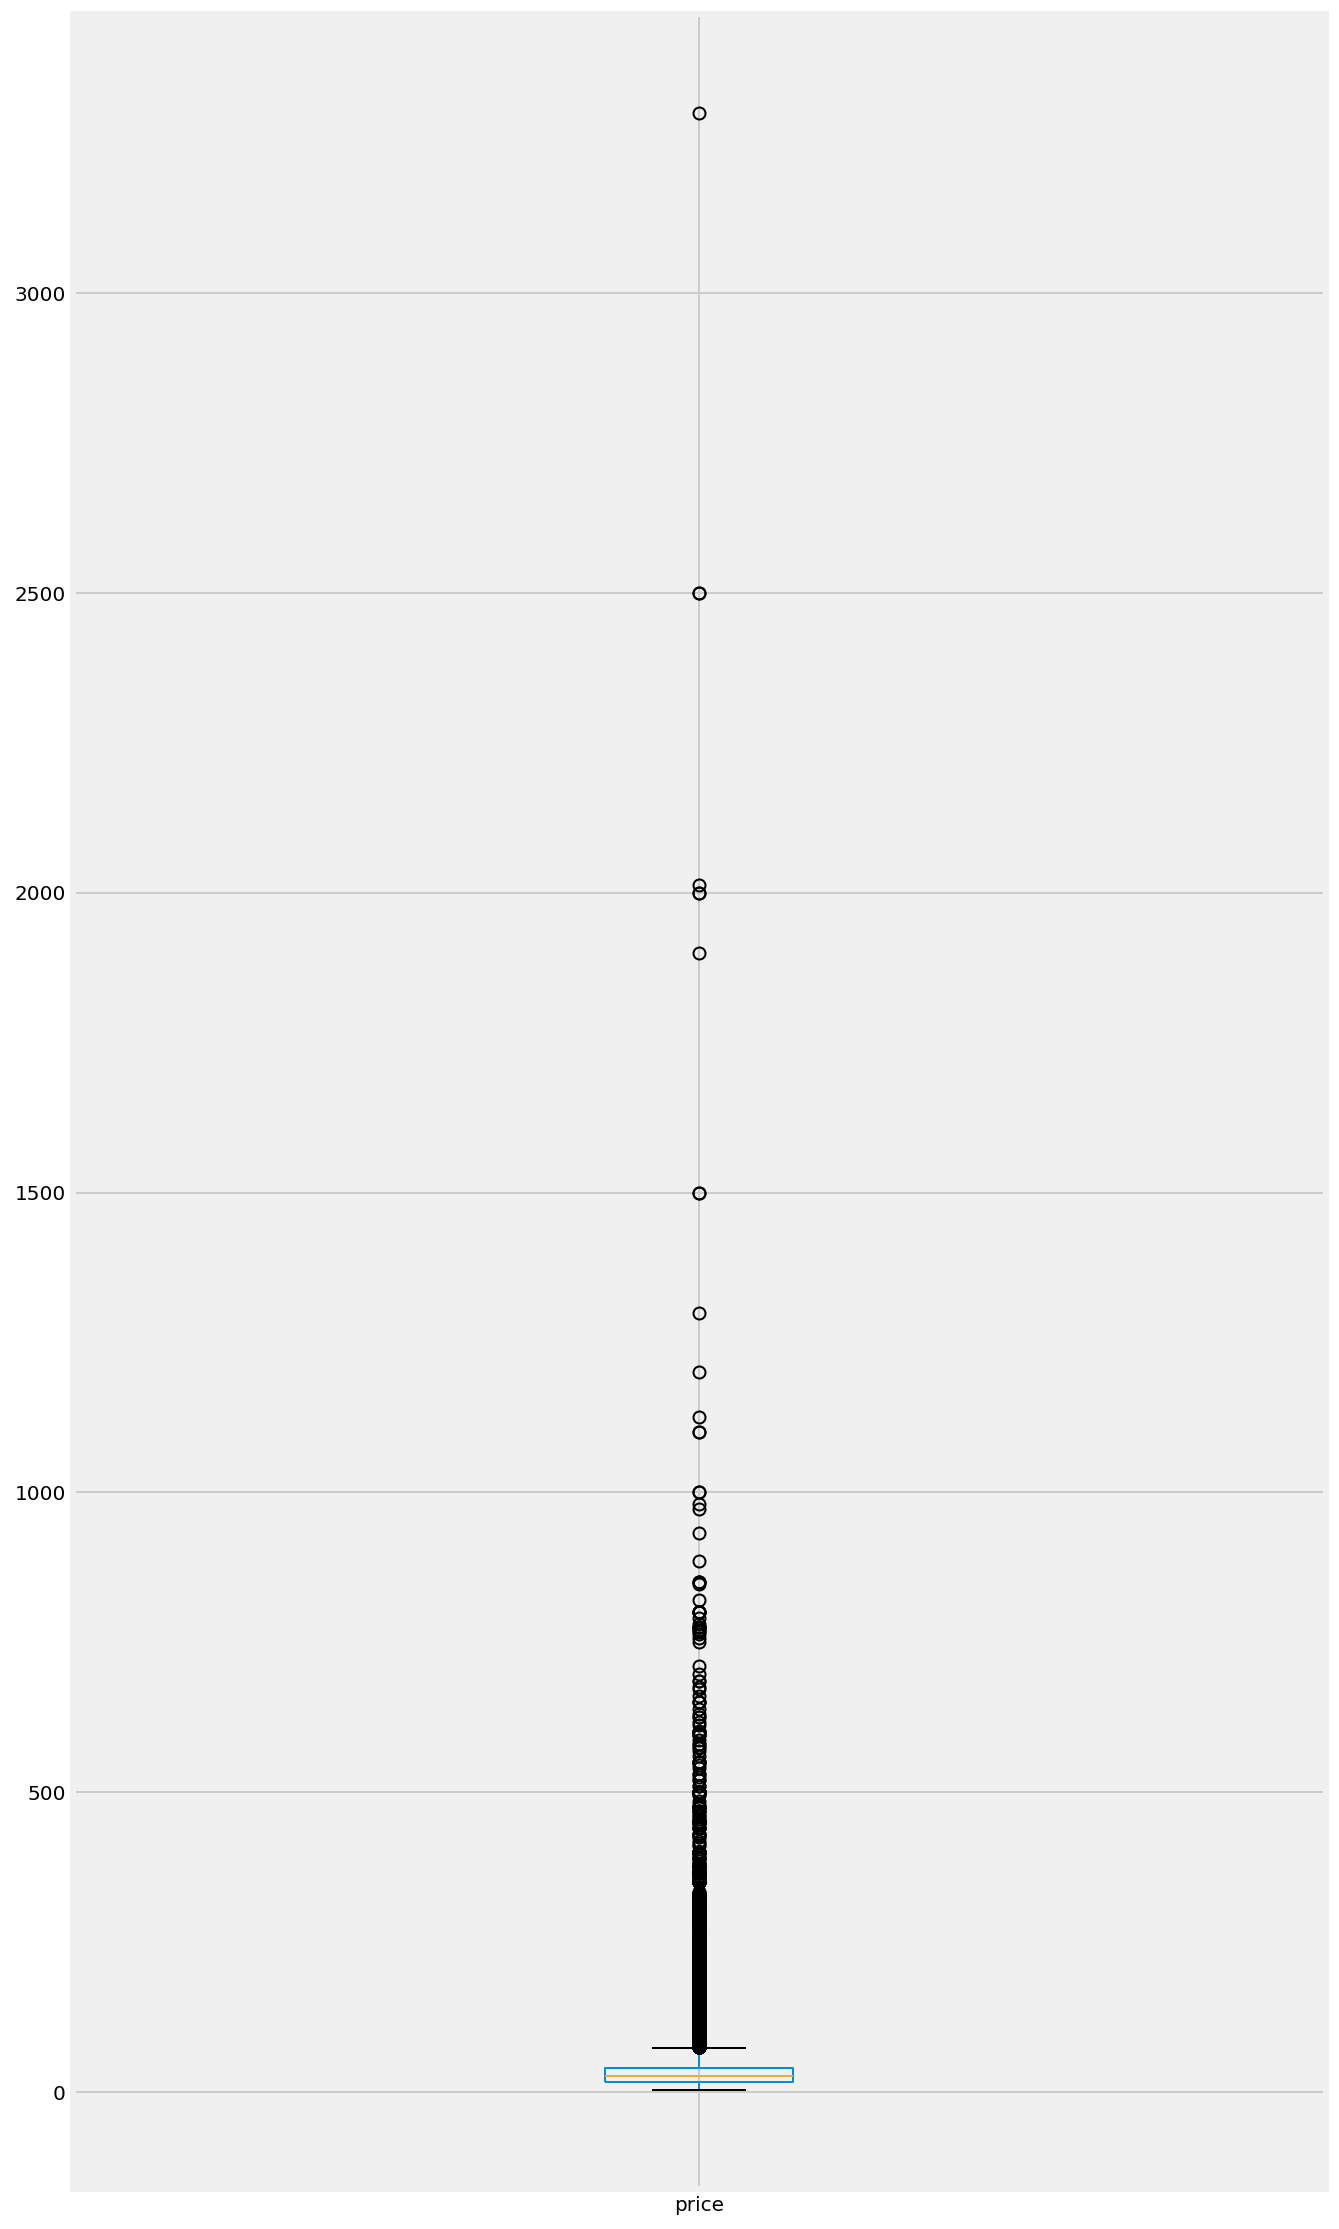

In [20]:
df.price.plot(kind='box', figsize = (10,20))

In [21]:
#delete outliers, as defined as more than 3 standard deviations away from the mean
mean = 35.363389
STD = 41.022218

In [22]:
#set the threshold at over 5 standard deviations above the mean
#anything above that threshold is considered to be a significant outlier, and therefore were removed from the dataset
threshold = mean+5*STD
threshold

240.47447900000003

In [23]:
df = df.loc[(df["price"] < threshold)]

In [24]:
df.shape

(103210, 9)

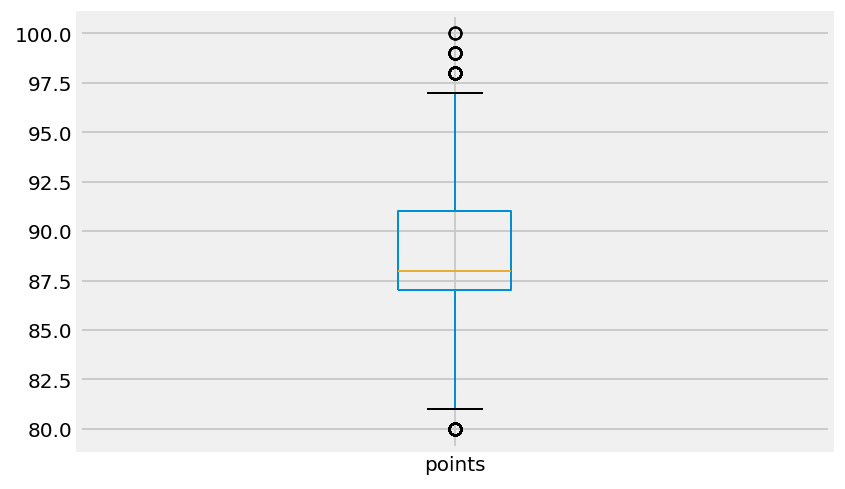

In [26]:
df.points.plot(kind='box')
#looks like the points were normally distributed between 80 and 100

In [27]:
df.isnull().sum()

country            0
description        0
points             0
price              0
province           0
region_1       20742
region_2       68470
taster_name        0
variety            0
dtype: int64

In [28]:
#turn all NaN for region_1 and region_2 into blanks
df = df.fillna(' ')

In [29]:
df.head()

,country,description,points,price,province,region_1,region_2,taster_name,variety
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,35.005009,Sicily & Sardinia,Etna,,Kerin O’Keefe,White Blend
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.000000,Douro,,,Roger Voss,Portuguese Red
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.000000,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Pinot Gris
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.000000,Michigan,Lake Michigan Shore,,Alexander Peartree,Riesling
4,US,"Much like the regular bottling from 2012, this...",87,65.000000,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Pinot Noir


## Actions need to be taken on the remaining columns
### - turn categories into nominal values using get_dummies:
    - country
    - province
    - region_1
    - region_2
    - variety 

In [30]:
#pull out description for the dummies dataframe
df_c = df.drop('description',axis=1)

In [31]:
categorical = df_c[['country', 'province','region_1','region_2','variety']]
df_dummies = pd.get_dummies(categorical)
df_dummies.head()

,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Bosnia and Herzegovina,country_Brazil,country_Bulgaria,country_Canada,country_Chile,country_China,...,variety_Yapincak,variety_Zelen,variety_Zibibbo,variety_Zierfandler,variety_Zierfandler-Rotgipfler,variety_Zinfandel,variety_Zlahtina,variety_Zweigelt,variety_Çalkarası,variety_Žilavka
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
numerical = df[['price','points']]
df_dummies = pd.concat([numerical,df_dummies],axis=1)
df_dummies.head()

,price,points,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Bosnia and Herzegovina,country_Brazil,country_Bulgaria,country_Canada,...,variety_Yapincak,variety_Zelen,variety_Zibibbo,variety_Zierfandler,variety_Zierfandler-Rotgipfler,variety_Zinfandel,variety_Zlahtina,variety_Zweigelt,variety_Çalkarası,variety_Žilavka
0,35.005009,87,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.000000,87,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14.000000,87,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13.000000,87,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,65.000000,87,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### !! hooray, we have a dummified dataset, now let's move on to building an NLP dataset off of the descriptions, so we can test both and see which one performs better, and limit the features

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
X = df.description
#set up cv = CountVectorizer, discount stop words in english, account for accents, each word must appear 2x
cv = CountVectorizer(stop_words='english',min_df=2, strip_accents= unicode)
cv.fit(X)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=2,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=<type 'unicode'>, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [35]:
df_nlp = pd.DataFrame(cv.transform(X).todense(),
                columns = cv.get_feature_names())
df_nlp.head()

,000,01,03,04,05,06,07,08,09,10,...,zédé,àmaurice,église,élevage,élevé,élévage,émilion,öküzgözü,über,ürziger
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Ran the following cells to test the general performance of the models on the dataframe, commented them out for the sake of run-time

In [38]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [39]:
target = df.taster_name
X_nlp = df_nlp
X_class = df_dummies

In [55]:
#so what is the baseline for the model performance?
target.value_counts()

Roger Voss            25238
Michael Schachner     15092
Kerin O’Keefe         10723
Paul Gregutt           9530
Virginie Boone         9514
Matt Kettmann          6329
Joe Czerwinski         5112
Sean P. Sullivan       4966
Anna Lee C. Iijima     4391
Jim Gordon             4177
Anne Krebiehl MW       3675
Lauren Buzzeo          1828
Susan Kostrzewa        1079
Mike DeSimone           502
Jeff Jenssen            468
Alexander Peartree      414
Carrie Dykes            139
Fiona Adams              27
Christina Pickard         6
Name: taster_name, dtype: int64

In [57]:
target.shape

(103210,)

In [68]:
print 'Baseline:', (float(target.value_counts()[0])/len(target))
#this means that for the model to perform well, must be better than .2445

Baseline: 0.244530568743


In [40]:
# %%time
# #** takes min 22 minutes to run
# # dummified dataset models

# models = []
# models.append(('LOR', LogisticRegression()))
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('DTC', DecisionTreeClassifier()))
# models.append(('RFC', RandomForestClassifier()))

# # Evaluate each model in turn
# result = []
# names = []
# for name, model in models:
#     kfold = StratifiedKFold()
#     cv_results = cross_val_score(model, X_class, target,cv=kfold, scoring='accuracy')
    
#     result.append(cv_results)
#     names.append(name)
#     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#     print(msg)

In [41]:
# %%time
# took 8 hours to run, so I commented out this section

# #countvectorized dataset performance

# models = []
# models.append(('LOR', LogisticRegression()))
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('DTC', DecisionTreeClassifier()))
# models.append(('RFC', RandomForestClassifier()))

# # Evaluate each model in turn
# results = []
# names = []
# for name, model in models:
#     kfold = StratifiedKFold()
#     cv_results = cross_val_score(model, X_nlp, target,cv=kfold, scoring='accuracy')
    
#     results.append(cv_results)
#     names.append(name)
#     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#     print(msg)

#### The above commented out code determined that both datasets "outperformed" meaning that they seemed to be overfit, so decided to run train/test using LOGREG and KNN on just the classified model, after elminating the "extraneous" columns, defined as having a total of less than 1% of the total dataset (1,200)

In [43]:
col_list = []
for col in df_dummies:
    if df_dummies[col].sum() <= 1200:
        col_list.append(col)

In [44]:
df_dummies1200 = df_dummies.drop(col_list, axis=1)
df_dummies1200.head()

,price,points,country_Argentina,country_Australia,country_Austria,country_Chile,country_France,country_Germany,country_Italy,country_New Zealand,...,variety_Rhône-style Red Blend,variety_Riesling,variety_Rosé,variety_Sangiovese,variety_Sauvignon Blanc,variety_Sparkling Blend,variety_Syrah,variety_Tempranillo,variety_White Blend,variety_Zinfandel
0,35.005009,87,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,15.000000,87,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14.000000,87,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13.000000,87,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,65.000000,87,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
%%time
#dummified and requiring 1200 members in each column

models = []
models.append(('LOR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))

# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold()
    cv_results = cross_val_score(model, df_dummies1200, target,cv=kfold, scoring='accuracy')
    
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LOR: 0.875855 (0.000880)
KNN: 0.847796 (0.001975)
DTC: 0.868220 (0.000189)
RFC: 0.875952 (0.000304)
CPU times: user 1min 5s, sys: 1.11 s, total: 1min 6s
Wall time: 1min 6s


In [36]:
#limit the number of countvectorized features to 1200, 

cv1200 = CountVectorizer(stop_words='english',min_df=2, strip_accents= unicode,max_features=1200)
cv1200.fit(X)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=1200, min_df=2,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=<type 'unicode'>, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [37]:
df_nlp1200 = pd.DataFrame(cv.transform(X).todense(),
                columns = cv.get_feature_names())
df_nlp1200.head()

,000,01,03,04,05,06,07,08,09,10,...,zédé,àmaurice,église,élevage,élevé,élévage,émilion,öküzgözü,über,ürziger
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# %%time
# # processing took over 1 hour, so I commented out this code.

# #limited to 1200 features using countvectorizer

# models = []
# models.append(('LOR', LogisticRegression()))
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('DTC', DecisionTreeClassifier()))
# models.append(('RFC', RandomForestClassifier()))

# # Evaluate each model in turn
# results = []
# names = []
# for name, model in models:
#     kfold = StratifiedKFold()
#     cv_results = cross_val_score(model, df_nlp1200, target,cv=kfold, scoring='accuracy')
    
#     results.append(cv_results)
#     names.append(name)
#     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#     print(msg)

In [48]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(df_dummies1200, target, test_size=0.2)

In [50]:
#run logistic regression on classification dataframe
logreg = LogisticRegression()
knn = KNeighborsClassifier()

logreg.fit(Xc_train, yc_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
#check overfit for dummified datasets
scores_dummies = cross_val_score(logreg, Xc_test, yc_test, cv=10)
print scores_dummies
print scores_dummies.mean()

In [52]:
scores_dummies = cross_val_score(knn, Xc_test, yc_test, cv=10)
print scores_dummies
print scores_dummies.mean()

[0.82304725 0.81120232 0.78927018 0.81122943 0.81540698 0.80077557
 0.80980107 0.81659389 0.81623724 0.79912451]


In [69]:
X_train, X_test, y_train, y_test = train_test_split(df_nlp1200, target, test_size=0.2)

In [70]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
#check overfit for limited natural language processing df
scores_nlp = cross_val_score(logreg, X_test, y_test, cv=10)
print scores_nlp
print scores_nlp.mean()

/Users/rebeccabadner/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[0.95364558 0.94589372 0.9540619  0.9521045  0.95157385 0.94864341
 0.95155039 0.95628946 0.94703596 0.95038911]


In [ ]:
scores_nlp = cross_val_score(knn, X_test, y_test, cv=10)
print scores_nlp
print scores_nlp.mean()

## For datasets, the models performed incredibly well, and having cross-validated the answers, we can easily see that the models perform well on both the train and test sets, accounting for overfit as much as possible

### In Conclusion: with regard to model choice, I would choose either logistic regression or knn depending on how important interpretability of features is, and while natural langauge processing performed better, I would be concerned about overfit, given that the baseline is close to 25%. However, both sets of models on both datasets performed well above baseline on both train and test datasets, so all 4 models work and could be used on new datasets with the same features

# Examples of what would I do with more time/data:
#### -  test various amounts of dummied variables, allow the models to run on everything
#### - Use TFIDF or other NLP programs on the description aspect of the dataset
#### - Run other NLP programs, such as sentiment analysis, part of speech or other linguistic analytics to see if we can predict tasters based on the tone of their descriptive language